this notbook was from a guide by Ketan Doshi : https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505

Audio data for your deep learning models will usually start out as digital audio files. From listening to sound recordings and music, we all know that these files are stored in a variety of formats based on how the sound is compressed. Examples of these formats are .wav, .mp3, .wma, .aac, .flac and many more.

Python has some great libraries for audio processing. Librosa is one of the most popular and has an extensive set of features.

They all let you read audio files in different formats. The first step is to load the file. With librosa:

In [2]:

import librosa


# Load the audio file
AUDIO_FILE = r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\audi\train\wav\SWH-05-20101106\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [11]:
samples

array([0.03039551, 0.02859497, 0.02774048, ..., 0.08853149, 0.09457397,
       0.07962036], dtype=float32)

In [12]:
sample_rate

16000

You can then visualize the sound wave:

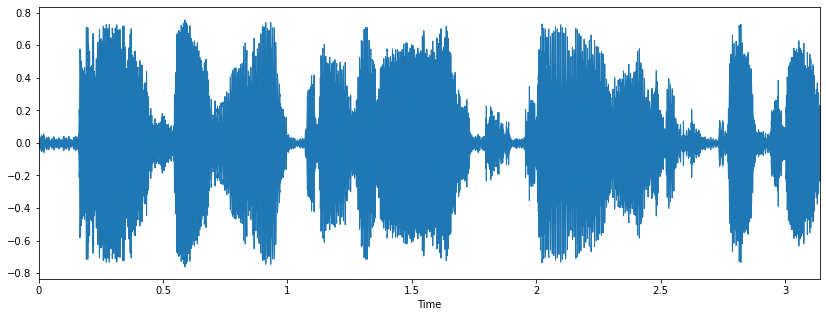

In [3]:
import librosa.display
import matplotlib.pyplot as plt

# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [5]:
from IPython.display import Audio
Audio(AUDIO_FILE)

audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample. The metadata for that audio tells us the sampling rate which is the number of samples per second.

In [9]:
print ('Example shape ', samples.shape, 'Sample rate:', sample_rate, ' Data type', type(samples))
print (samples[22400:22420])

Example shape  (50240,) Sample rate: 16000  Data type <class 'numpy.ndarray'>
[0.16363525 0.22949219 0.2928772  0.31262207 0.36087036 0.42684937
 0.387146   0.30841064 0.2966919  0.44613647 0.56799316 0.44592285
 0.20806885 0.12142944 0.28414917 0.40567017 0.36288452 0.23516846
 0.2121582  0.2524109 ]


the common practice is to convert the audio into a spectrogram. The spectrogram is a concise ‘snapshot’ of an audio wave and since it is an image, it is well suited to being input to CNN-based architectures developed for handling images.

Spectrograms are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.

It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color the higher the energy of the signal.

C:\Users\Jakinda\anaconda3\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


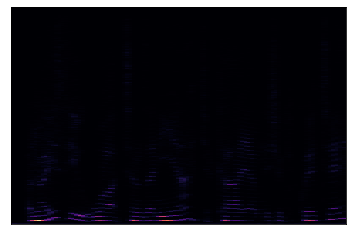

In [10]:

sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

## Mel Spectrograms
A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

    1. It uses the Mel Scale instead of Frequency on the y-axis.
    2. It uses the Decibel Scale instead of Amplitude to indicate colors.
    
For deep learning models, we usually use this rather than a simple Spectrogram.
Let’s modify our Spectrogram code above to use the Mel Scale in place of Frequency.

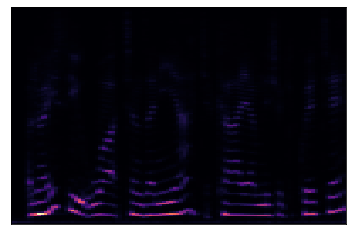

In [13]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

but most of the spectrogram is still dark and not carrying enough useful information. So let’s modify it to use the Decibel Scale instead of Amplitude.

In [15]:
import numpy as np

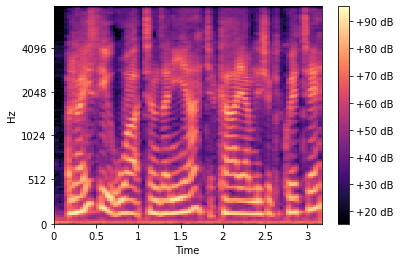

In [16]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [17]:
#Spectrogram is a 2D numpy array
print(type(mel_sgram), mel_sgram.shape)
# <class 'numpy.ndarray'> (128, 134)

<class 'numpy.ndarray'> (128, 99)


In [18]:
import sklearn

C:\Users\Jakinda\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Jakinda\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


MFCC is of type <class 'numpy.ndarray'> with shape (20, 99)


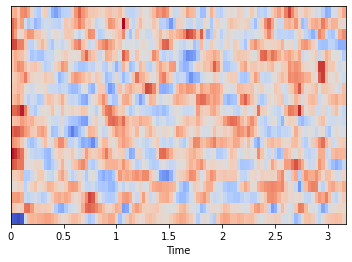

In [19]:
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)